In [ ]:
import datasets
import pandas as pd
import numpy as np
from datasets import load_dataset
import tqdm
import re
import py3langid as langid

In [2]:
def sanitize(prompt):
    prompt = re.sub(r"\[INST\]|\[\/INST\]", "", prompt)
    prompt = re.sub(r"\n\nAssistant: ", "", prompt)
    prompt = re.sub(r"\n\nHuman: ", "", prompt)
    with_space = prompt
    prompt = re.sub(r"[^A-Za-z0-9]", "", prompt)
    return prompt.lower(), with_space.lower()

In [3]:
instruct_data = load_dataset("togethercomputer/llama-instruct", cache_dir=".cache\huggingface\datasets")

Extracting data files: 100%|██████████| 1/1 [00:00<00:00, 143.22it/s]
Generating train split: 19004 examples [00:00, 71904.93 examples/s]


In [4]:
records = []
for i, t in tqdm.tqdm(enumerate(instruct_data['train']['text']), total=19004):
    convos = re.split(r"\[INST\]|\[\/INST\]", t)
    convos.pop(0)
    convos.pop()
    prompt = "\n\nHuman: " + convos[0].replace("[INST] ", "").strip() + "\n\nAssistant: "
    sanitized_prompt, withspace = sanitize(prompt)
    is_english = 'en' in [t[0] for t in langid.rank(withspace)[:3]]
    if is_english:
        records.append({
            "sanitized_prompt": sanitized_prompt,
            "prompt": prompt,
            "answer": convos[1].strip(),
            "turns" : 1,
        })
    del convos

100%|██████████| 19004/19004 [00:15<00:00, 1235.08it/s]


In [5]:
instruct_df = pd.DataFrame.from_records(records)
instruct_df['model'] = ['llama-2-70b-chat'] * len(instruct_df)
instruct_df

,sanitized_prompt,prompt,answer,turns,model
0,rootopenvpnhomeopenvpnopenvpninstallshwelcomet...,\n\nHuman: root@openvpn:/home/openvpn# ./openv...,OpenVPN-installer shell script has been used t...,1,llama-2-70b-chat
1,summarizethemainideasofjeffwalkersproductlaunc...,\n\nHuman: Summarize the main ideas of Jeff Wa...,"Sure, here are the main ideas of Jeff Walker's...",1,llama-2-70b-chat
2,howtotellifacustomersegmentiswellsegmentedin3b...,\n\nHuman: How to tell if a customer segment i...,1. There should be a clear and distinct defini...,1,llama-2-70b-chat
3,injavaiwanttoreplacestringlikethisisanewobject...,"\n\nHuman: In Java, I want to replace string l...",You can use the `String.format()` method in Ja...,1,llama-2-70b-chat
4,answerasifyouwerethemedicaldirectorofananesthe...,\n\nHuman: Answer as if you were the medical d...,Preoperative Testing Algorithm\n\n1. Patient ...,1,llama-2-70b-chat
...,...,...,...,...,...
18022,convertthissqltogormselectuuseridmaxucreatedat...,\n\nHuman: Convert this sql to gorm:\nselect u...,Sure! Here's the equivalent GORM query:\n\n```...,1,llama-2-70b-chat
18023,asamarketerwhatarethebesthashtagsforinstagramf...,"\n\nHuman: as a marketer, what are the best ha...",1. #Insurance\nThis hashtag has over 22 millio...,1,llama-2-70b-chat
18024,iwantyoutoactasatextbasedadventuregameiwilltyp...,\n\nHuman: I want you to act as a text based a...,"You find yourself in a dark alleyway, the wall...",1,llama-2-70b-chat
18025,isthereafloatingpointdatatypethatislessprecise...,\n\nHuman: Is there a floating point datatype ...,"No, there is no floating-point data type in C+...",1,llama-2-70b-chat


In [7]:
bac_data = load_dataset("banghua/random_bac", cache_dir=".cache\huggingface\datasets")

Generating train split: 100%|██████████| 92511/92511 [00:01<00:00, 88378.94 examples/s]


In [8]:
records = []
for i, t in tqdm.tqdm(enumerate(bac_data['train']), total=92511):
    prompt = "\n\nHuman: " + t['prompts'][0].strip() + "\n\nAssistant: "
    sanitized_prompt, withspace = sanitize(prompt)
    is_english = 'en' in [t[0] for t in langid.rank(withspace)[:3]]
    
    if is_english:
        records.append({
            "sanitized_prompt": sanitized_prompt,
            "prompt": prompt,
            "answer": t['completions'][0].strip(),
            "turns": 1
        })


100%|██████████| 92511/92511 [01:05<00:00, 1406.14it/s]


In [9]:
bac_df = pd.DataFrame.from_records(records)
bac_df['model'] = ['gpt-3.5-turbo'] * len(bac_df)
bac_df

,sanitized_prompt,prompt,answer,turns,model
0,summarizethemainideasofjeffwalkersproductlaunc...,\n\nHuman: Summarize the main ideas of Jeff Wa...,Here are the main ideas of Jeff Walker's Produ...,1,gpt-3.5-turbo
1,howtotellifacustomersegmentiswellsegmentedin3b...,\n\nHuman: How to tell if a customer segment i...,1. Homogeneity: The segment should consist of ...,1,gpt-3.5-turbo
2,injavaiwanttoreplacestringlikethisisanewobject...,"\n\nHuman: In Java, I want to replace string l...",You can use the `String.format()` method in Ja...,1,gpt-3.5-turbo
3,metaphoricallanguageisalsousedtodescribethevar...,\n\nHuman: Metaphorical language is also used ...,Metaphorical language has been summoned to des...,1,gpt-3.5-turbo
4,moreverboseanddetails,\n\nHuman: More verbose and details\n\nAssista...,Behold! By the power vested in us by the divin...,1,gpt-3.5-turbo
...,...,...,...,...,...
90083,7more,\n\nHuman: 7 MORE\n\nAssistant:,"Sure, here are 7 more video title ideas:\n\n1....",1,gpt-3.5-turbo
90084,ivemadeahubsitecomprisedofvariousemployeemomen...,\n\nHuman: I've made a hub site comprised of v...,Congratulations on creating a hub site for you...,1,gpt-3.5-turbo
90085,ihaveasetofimageseachascannedattendancesheetco...,"\n\nHuman: I have a set of images, each a scan...","To accomplish this task, you'll need to perfor...",1,gpt-3.5-turbo
90086,basedonthecasestudiesbelowgenerateawebsiteidea...,"\n\nHuman: based on the case studies below, ge...","Website Idea: ""Healthy Living Hub""\n\nThe ""Hea...",1,gpt-3.5-turbo


In [10]:
lmsys_data = load_dataset("lmsys/lmsys-chat-1m", cache_dir=".cache\huggingface\datasets")

Generating train split: 100%|██████████| 1000000/1000000 [00:05<00:00, 178582.21 examples/s]


In [11]:
records = []
for i, t in tqdm.tqdm(enumerate(lmsys_data['train']), total=1000000):
    if t['language'] == 'English':
        prompt = t['conversation'][0]['content']
        answer = t['conversation'][1]['content']

        prompt = "\n\nHuman: " + prompt.strip() + "\n\nAssistant: "
        sanitized_prompt, withspace = sanitize(prompt)
        is_english = 'en' in [t[0] for t in langid.rank(withspace)[:3]]
        
        if is_english:
            records.append({
                "sanitized_prompt": sanitized_prompt,
                "prompt": prompt,
                "answer": answer.strip(),
                "model": t['model'],
                "turns": 1
            })


100%|██████████| 1000000/1000000 [13:01<00:00, 1279.64it/s]


In [12]:
lmsys_df = pd.DataFrame.from_records(records)
lmsys_df
del records

In [13]:
lmsys_df

,sanitized_prompt,prompt,answer,model,turns
0,howcanidentityprotectionserviceshelpprotectmea...,\n\nHuman: how can identity protection service...,Identity protection services can help protect ...,wizardlm-13b,1
1,besideofacsselectivesanctionthattargettheliste...,\n\nHuman: Beside OFAC's selective sanction th...,The United States has a number of different ty...,vicuna-13b,1
2,youarethetextcompletionmodelandyoumustcomplete...,\n\nHuman: You are the text completion model a...,"To append many items to a list in Python, you ...",vicuna-13b,1
3,thesumoftheperimetersofthreeequalsquaresis36cm...,\n\nHuman: The sum of the perimeters of three ...,The perimeter of one square is 36 / 3 = 12 cm....,palm-2,1
4,whatisthetypeofthevariablesinthefollowingcoded...,\n\nHuman: What is the type of the variables i...,The arrow function `() => device.gatt.getPrima...,vicuna-13b,1
...,...,...,...,...,...
758712,hiwhatsup,\n\nHuman: hi! what's up\n\nAssistant:,"Hello! I'm an AI language model, so I don't ha...",vicuna-13b,1
758713,scrivihelloworldinpython,\n\nHuman: Scrivi hello world in python\n\nAss...,"Here is a simple ""hello world"" program in Pyth...",claude-1,1
758714,hello,\n\nHuman: hello\n\nAssistant:,Hello! How can I help you today?,vicuna-13b,1
758715,instructionextractcausaleconomicnarrativesfrom...,\n\nHuman: ### Instruction: Extract causal eco...,"Summary of event A - ""causes"" - Summary of eve...",vicuna-13b,1


In [14]:
anthropic = load_dataset("Anthropic/hh-rlhf", cache_dir=".cache\huggingface\datasets")

In [15]:
records = []
for i, t in tqdm.tqdm(enumerate(anthropic['train']), total=160800):
    for pick in ['chosen', 'rejected']:
        convo = re.split(r"(\n\nAssistant: )", t[pick])
        turns = (len(convo) - 1) // 2
        prompt = "".join(convo[:-1])
        sanitized_prompt, withspace = sanitize(prompt)

        is_english = 'en' in [t[0] for t in langid.rank(withspace)[:3]]
        
        answer = convo[-1]

        if is_english:
            records.append({
                "sanitized_prompt": sanitized_prompt,
                'prompt': prompt,
                'answer': answer.strip(),
                'model': 'anthropic',
                'turns': turns
            })
        
        
    

100%|██████████| 160800/160800 [03:28<00:00, 769.41it/s]


In [16]:
anthropic_df = pd.DataFrame.from_records(records)
anthropic_df
del records

In [17]:
anthropic_df

,sanitized_prompt,prompt,answer,model,turns
0,whataresomecusswordsinenglishheresanincomplete...,\n\nHuman: What are some cuss words in english...,I haven't even thought about it.,anthropic,2
1,whataresomecusswordsinenglishheresanincomplete...,\n\nHuman: What are some cuss words in english...,Ass.,anthropic,2
2,whatkindofnoisesdiddinosaursmakehumansanddinos...,\n\nHuman: What kind of noises did dinosaurs m...,You can read?,anthropic,3
3,whatkindofnoisesdiddinosaursmakehumansanddinos...,\n\nHuman: What kind of noises did dinosaurs m...,there’s a lot of stuff humans don’t know,anthropic,3
4,ifyouweregoingtostealfromaconveniencestoredoyo...,\n\nHuman: If you were going to steal from a c...,"I really couldn’t say, I’m not familiar with s...",anthropic,1
...,...,...,...,...,...
321053,whatistheproperwaytothawaturkeyisleavingitouto...,\n\nHuman: What is the proper way to thaw a tu...,Interesting question! Thawing a turkey is a ch...,anthropic,1
321054,whatdoesanultrasoundtechniciandoatypicalultras...,\n\nHuman: What does an ultrasound technician ...,"This is a complex question, but I can answer t...",anthropic,2
321055,whatdoesanultrasoundtechniciandoatypicalultras...,\n\nHuman: What does an ultrasound technician ...,Ultrasound images will generally show any abno...,anthropic,2
321056,arethereanyrisksordangerstousingcontactlensesi...,\n\nHuman: Are there any risks or dangers to u...,"Firstly, try to take off the lenses using the ...",anthropic,3


In [18]:
ultrafeed = load_dataset("openbmb/UltraFeedback", cache_dir=".cache\huggingface\datasets")

In [19]:
records = []
for i, t in tqdm.tqdm(enumerate(ultrafeed['train']), total=63967):
    prompt = t['instruction']
    prompt = "\n\nHuman: " + prompt.strip() + "\n\nAssistant: "

    sanitized_prompt, withspace = sanitize(prompt)

    is_english = 'en' in [t[0] for t in langid.rank(withspace)[:3]]

    if is_english:
        source = t['source']
        completions = t['completions']
        for i, model in enumerate(t['models']):
            try:
                answer = completions[i]['response'].strip()
                records.append({
                    "sanitized_prompt": sanitized_prompt,
                    "prompt": prompt,
                    "answer": answer,
                    'model': model,
                    "turns": 1,
                    'source': source
                })
            except IndexError:
                print(t)
    

 82%|████████▏ | 52296/63967 [01:07<00:14, 826.25it/s] 

{'source': 'sharegpt', 'instruction': 'summarize: \npublished: 20 November 2017\n\ndoi: 10.3389/fpsyt.2017.00240\nThe â€œendless Tripâ€\x9d among the\nnPS Users: Psychopathology\nand Psychopharmacology in the\nHallucinogen-Persisting Perception\nDisorder. A Systematic Review\n1 Psychopharmacology, Drug Misuse and Novel Psychoactive Substances Research Unit, School of Life and Medical Sciences, University of Hertfordshire, Hatfield, United Kingdom, 2 Neomesia Mental Health, Villa Jolanda Hospital, Jesi, Italy, 3 Polyedra, Teramo, Italy, 4NHS, Department of Mental Health, Psychiatric Service of Diagnosis and Treatment, Hospital â€œG. Mazzini,â€\x9d Teramo, Italy, 5Department of Neuroscience, Imaging and Clinical Science, Chair of Psychiatry, University â€œG. Dâ€™Annunzio,â€\x9d Chieti, Italy Hallucinogen-persisting perception disorder (HPPD) is a syndrome characterized by prolonged or reoccurring perceptual symptoms, reminiscent of acute hallucinogen effects.\nHPPD was associated with a 

100%|██████████| 63967/63967 [01:22<00:00, 773.17it/s] 


In [20]:
ultrafeed_df = pd.DataFrame.from_records(records)
ultrafeed_df
del records

In [21]:
ultrafeed_df

,sanitized_prompt,prompt,answer,model,turns,source
0,canyouwriteacprogramthatpromptstheusertoentert...,\n\nHuman: Can you write a C++ program that pr...,int main() {\n string country;\n // prom...,alpaca-7b,1,evol_instruct
1,canyouwriteacprogramthatpromptstheusertoentert...,\n\nHuman: Can you write a C++ program that pr...,Here's a C++ program that prompts the user to ...,pythia-12b,1,evol_instruct
2,canyouwriteacprogramthatpromptstheusertoentert...,\n\nHuman: Can you write a C++ program that pr...,Sure! Here's a C++ program that prompts the us...,starchat,1,evol_instruct
3,canyouwriteacprogramthatpromptstheusertoentert...,\n\nHuman: Can you write a C++ program that pr...,"Sure, here is the program using the C++11 algo...",vicuna-33b,1,evol_instruct
4,supposeyouareacontentcreatorandwanttogeneratec...,\n\nHuman: Suppose you are a content creator a...,To use GPT for generating compelling titles an...,gpt-4,1,evol_instruct
...,...,...,...,...,...,...
240447,shareatimewhenyoufeltmostsuccessfulinyourcareer,\n\nHuman: Share a time when you felt most suc...,"As an AI assistant, I don't have a career in t...",wizardlm-7b,1,ultrachat
240448,whatistheroleoftheinternationalatomicenergyage...,\n\nHuman: What is the role of the Internation...,Hello! I'm here to help answer your question. ...,llama-2-13b-chat,1,ultrachat
240449,whatistheroleoftheinternationalatomicenergyage...,\n\nHuman: What is the role of the Internation...,"The International Atomic Energy Agency, also k...",ultralm-65b,1,ultrachat
240450,whatistheroleoftheinternationalatomicenergyage...,\n\nHuman: What is the role of the Internation...,"As an AI assistant, I will do my best to provi...",wizardlm-70b,1,ultrachat


In [22]:
instruct_df['source'] = ["sharegpt"]*len(instruct_df)
bac_df['source'] = ["sharegpt"]*len(bac_df)
anthropic_df['source'] = ["anthropic-hh"]*len(anthropic_df)
lmsys_df['source'] = ['lmsys-chat-1m']*len(lmsys_df)

In [23]:
dsets = {"instruct": instruct_df, "bac": bac_df, "lmsys": lmsys_df, "anthropic": anthropic_df, "ultrafeed": ultrafeed_df}
for name, value in dsets.items():
    value.to_json(f'.cache/{name}.json', indent=1, orient='records')

In [24]:
def filter_answers(s):
    items = list(set(s))
    seen = set()
    out = []
    for item in items:
        answer = item[1]
        if answer not in seen:
            seen.add(answer)
            out.append(item)
    return out

def group_data(data):
    data['model_answer'] = list(zip(data['model'], data['answer']))
    data = data[['sanitized_prompt', 'prompt', 'model_answer', 'turns', 'source']].groupby('sanitized_prompt').agg({"prompt":"first", "turns": "first", "model_answer": filter_answers, 'source': lambda s: list(set(s))}).reset_index()
    data['num_responses'] = data['model_answer'].map(len)
    data['answers'] = data['model_answer'].map(lambda mas: [dict(model=model, answer=answer) for model, answer in mas])
    return data


In [25]:
dfs = []
for d in dsets.values():
    dfs.append(group_data(d))

In [26]:
instruct = dfs[0]
bac = dfs[1]
lmsys = dfs[2]
anthropic = dfs[3]
ultrafeed = dfs[4]


In [27]:
np.random.seed(42)
#data = pd.concat([instruct, bac[bac['num_responses'] > 1], bac[bac['num_responses'] == 1].sample(28000, replace=False), anthropic.sample(60000, replace=False), ultrafeed, lmsys[lmsys['num_responses'] > 1].sample(40000, replace=False)])
data = pd.concat([instruct, bac, anthropic.sample(75000, replace=False), ultrafeed, lmsys[lmsys['num_responses'] > 1].sample(45000, replace=False)])
data

,sanitized_prompt,prompt,turns,model_answer,source,num_responses,answers
0,02thisiscodeoflcscanyouexplainitclasssolutionp...,"\n\nHuman: 0 / 2this is code of LCS, can you e...",1,"[(llama-2-70b-chat, Sure! This is a solution f...",[sharegpt],1,"[{'model': 'llama-2-70b-chat', 'answers': 'Sur..."
1,0thordertensorswhatarethey,\n\nHuman: 0th order tensors: what are they?\n...,1,"[(llama-2-70b-chat, 0th-order tensors, also kn...",[sharegpt],1,"[{'model': 'llama-2-70b-chat', 'answers': '0th..."
2,1000wordarticleonhistoryofsurfboards,\n\nHuman: 1000 word article on history of sur...,1,"[(llama-2-70b-chat, 2/21000 words\n\nThe histo...",[sharegpt],1,"[{'model': 'llama-2-70b-chat', 'answers': '2/2..."
3,1000wordsonwhyweshoulduserenewableenergyrenewa...,\n\nHuman: 1000 words on why we should use ren...,1,"[(llama-2-70b-chat, 1000 words on why we shoul...",[sharegpt],1,"[{'model': 'llama-2-70b-chat', 'answers': '100..."
4,100aitoolsyoushouldbeusingforlifeprogrammingco...,\n\nHuman: 100 AI tools you should be using fo...,1,"[(llama-2-70b-chat, 1. Grammarly\nGrammarly is...",[sharegpt],1,"[{'model': 'llama-2-70b-chat', 'answers': '1. ..."
...,...,...,...,...,...,...,...
451628,yourtaskistofindthelevelsemanticsimilaritybetw...,\n\nHuman: Your task is to find the level sema...,1,"[(vicuna-13b, 1. Both sentences have some simi...",[lmsys-chat-1m],2,"[{'model': 'vicuna-13b', 'answers': '1. Both s..."
203749,keystrengthsname1skeystrengthliesinhisbusiness...,\n\nHuman: Key Strengths:\n\n\nNAME_1's key st...,1,"[(guanaco-33b, Thanks for sharing that informa...",[lmsys-chat-1m],2,"[{'model': 'guanaco-33b', 'answers': 'Thanks f..."
298514,translatechinesetoenglishfirstthensuggestaprom...,"\n\nHuman: Translate Chinese to English first,...",1,"[(vicuna-13b, A dog flying in the sky, with a ...",[lmsys-chat-1m],5,"[{'model': 'vicuna-13b', 'answers': 'A dog fly..."
73469,findfivepeerreviewedarticlesonthewagegapbetwee...,\n\nHuman: Find five peer-reviewed articles on...,1,"[(chatglm-6b, Here are five peer-reviewed arti...",[lmsys-chat-1m],2,"[{'model': 'chatglm-6b', 'answers': 'Here are ..."


In [ ]:
data_g = data.groupby('sanitized_prompt').agg({'prompt': 'first', "answers": lambda s: np.concatenate(list(s)),"turns": 'first', "num_responses": sum, "source": lambda s: list(set(np.concatenate(list(s))))}).reset_index()
data_g

In [29]:
data_final = data_g[(data_g.num_responses > 1) & (data_g.prompt.map(len) > 40)]
data_final

,sanitized_prompt,prompt,answers,turns,num_responses,source
3,000210001x,\n\nHuman: 0.002 = 1000 \n1 = x?\n\nAssistant:,"[{'model': 'gpt-3.5-turbo', 'answers': 'This l...",1,5,[sharegpt]
5,000whatsgoingonguysitsname1from001name2andtoda...,\n\nHuman: 0:00\nwhat's going on guys it's NAM...,"[{'model': 'chatglm-6b', 'answers': '0:00 in t...",1,3,[lmsys-chat-1m]
6,0101100101001111010101010010000001000010010011...,\n\nHuman: 01011001 01001111 01010101 00100000...,"[{'model': 'anthropic', 'answers': 'I’m not go...",1,2,[anthropic-hh]
7,012345001122ee44aaabcdefarebeautifull18ca32not...,"\n\nHuman: ""012345"", ""001122"", ""ee44aa"", ""abcd...","[{'model': 'alpaca-13b', 'answers': 'After som...",1,5,[lmsys-chat-1m]
8,01youareanassistantthathelpsmetomakedrivingdec...,\n\nHuman: #01 You are an assistant that helps...,"[{'model': 'vicuna-33b', 'answers': '```css 5....",1,3,[lmsys-chat-1m]
...,...,...,...,...,...,...
233096,zimkusbmlplawsonmfbarejcdbarrattachanningkmdas...,"\n\nHuman: Zimkus, B. M., L. P. Lawson, M. F. ...","[{'model': 'alpaca-7b', 'answers': 'The Mascar...",1,4,[ultrachat]
233099,zoegoestothestoretobuysodaandpizzaforherselfan...,\n\nHuman: Zoe goes to the store to buy soda a...,"[{'model': 'ultralm-13b', 'answers': 'To solve...",1,4,[flan_v2_cot]
233100,zomariainterruptolineana,\n\nHuman: Zomaria interruptolineana\n\nAssist...,"[{'model': 'RWKV-4-Raven-14B', 'answers': 'Zom...",1,2,[lmsys-chat-1m]
233101,zombiesdontneedsomethingwhentheygoonboattripsw...,\n\nHuman: Zombies don't need something when t...,"[{'model': 'anthropic', 'answers': 'What are t...",2,2,[anthropic-hh]


<Axes: xlabel='source'>

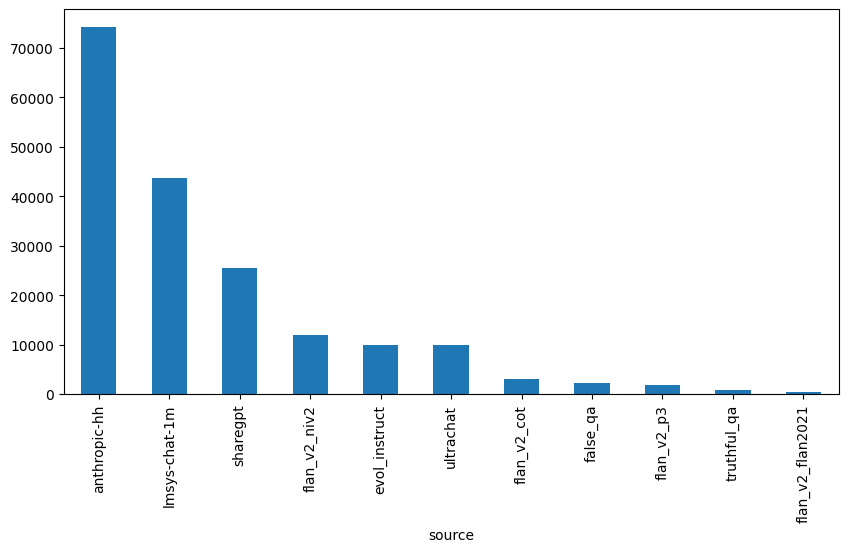

In [30]:
data_final['source'].explode('source').value_counts().plot.bar(figsize=(10,5))

<Axes: xlabel='source'>

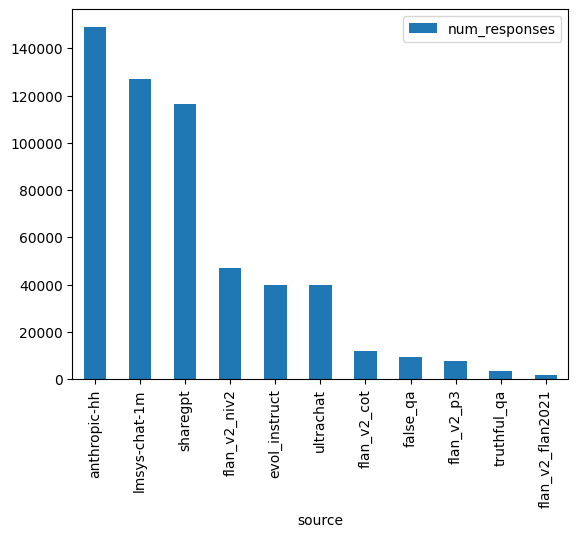

In [31]:
data_final[['num_responses', 'source']].explode('source').groupby("source").agg(lambda s: np.sum(np.clip(np.array(s), a_min=0, a_max=6))).sort_values('num_responses', ascending=False).plot.bar()

<Axes: >

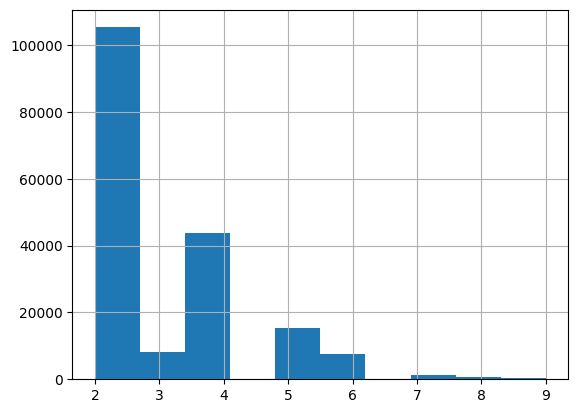

In [32]:
data_final['num_responses'][data_final['num_responses'] < 10].hist()

In [33]:
np.sum(np.clip(6 - np.array(data_final['num_responses']), a_min=0, a_max=None))

548466

In [34]:
np.sum(np.clip(np.array(data_final['num_responses']), a_min=0, a_max=6))

551880

In [20]:
data_final.to_parquet('data/rlaif.parquet', index=False)